In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import os
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_size = 150
labels = ['PNEUMONIA', 'NORMAL']
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype=object)

In [ ]:
train = get_training_data('/content/drive/MyDrive/Colab Notebooks/CNN/train')
val = get_training_data('/content/drive/MyDrive/Colab Notebooks/CNN/val')
test = get_training_data('/content/drive/MyDrive/Colab Notebooks/CNN/test')

In [ ]:
print('train_shape:',train.shape)
print('-------')
print('val_shape:',val.shape)
print('-------')
print('test_shape:',test.shape)

train_shape: (5232, 2)
-------
val_shape: (1040, 2)
-------
test_shape: (624, 2)


<Axes: xlabel='count'>

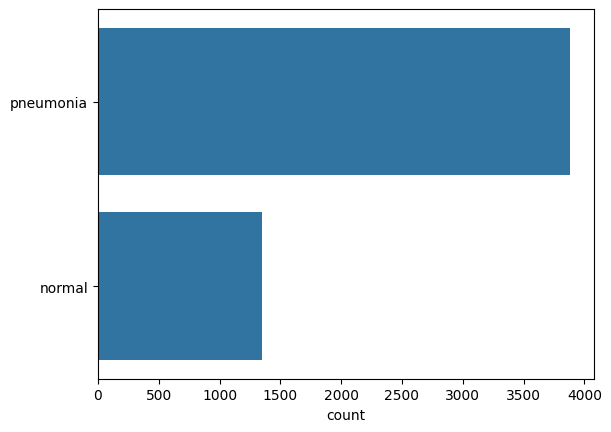

In [ ]:
lis = []
for i in train:
    if(i[1] == 0):
        lis.append("pneumonia")
    else:
        lis.append("normal")
sns.countplot(lis)

Text(0.5, 1.0, 'NORMAL')

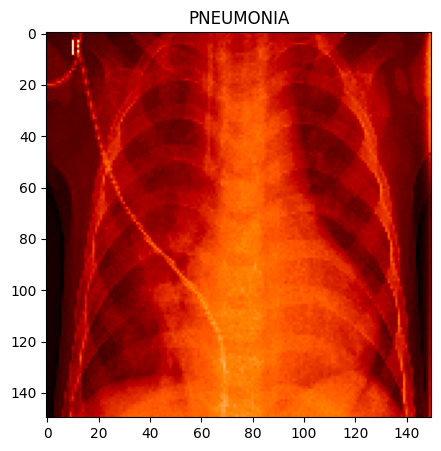

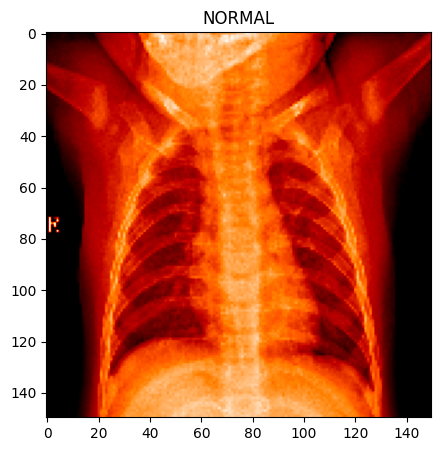

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gist_heat')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gist_heat')
plt.title(labels[train[-1][1]])

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adamax

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

opt = Adamax(learning_rate=0.0001,weight_decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [ ]:
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)


train_dir = '/content/drive/MyDrive/Colab Notebooks/CNN/train'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True
)



Found 5232 images belonging to 2 classes.


In [ ]:

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)


val_dir = '/content/drive/MyDrive/Colab Notebooks/CNN/val'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False

)



Found 1040 images belonging to 2 classes.


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
rlrp= ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[es,rlrp], verbose=1)

Epoch 1/50
164/164 [==============================] - 156s 703ms/step - loss: 0.3125 - accuracy: 0.8557 - val_loss: 0.2058 - val_accuracy: 0.9327 - lr: 1.0000e-04
Epoch 2/50
164/164 [==============================] - 114s 696ms/step - loss: 0.2485 - accuracy: 0.8932 - val_loss: 0.1756 - val_accuracy: 0.9337 - lr: 1.0000e-04
Epoch 3/50
164/164 [==============================] - 113s 690ms/step - loss: 0.2259 - accuracy: 0.9077 - val_loss: 0.1534 - val_accuracy: 0.9471 - lr: 1.0000e-04
Epoch 4/50
164/164 [==============================] - 114s 695ms/step - loss: 0.2033 - accuracy: 0.9180 - val_loss: 0.1473 - val_accuracy: 0.9519 - lr: 1.0000e-04
Epoch 5/50
164/164 [==============================] - 114s 692ms/step - loss: 0.1963 - accuracy: 0.9205 - val_loss: 0.1322 - val_accuracy: 0.9519 - lr: 1.0000e-04
Epoch 6/50
164/164 [==============================] - 114s 696ms/step - loss: 0.1964 - accuracy: 0.9199 - val_loss: 0.1514 - val_accuracy: 0.9442 - lr: 1.0000e-04
Epoch 7/50
164/164 [==

In [ ]:
model.save('model.cnn1')

Found 624 images belonging to 2 classes.


20/20 [==============================] - 6s 285ms/step
Accuracy: 89.74358974358975
F1: 92.25181598062954
Recall: 97.6923076923077
Precision: 87.38532110091744
Confusion Matrix:


<Axes: >

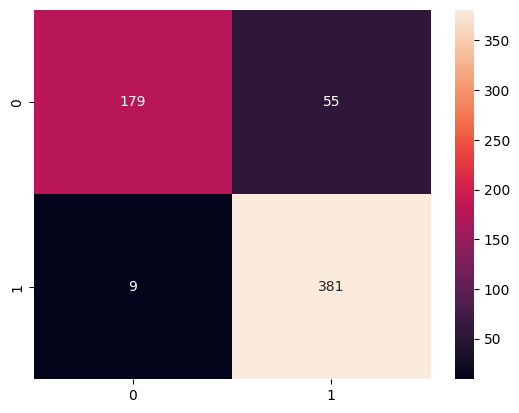

In [ ]:
model = load_model('model.cnn1')

batch_size=32
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
)

test_dir = '/content/drive/MyDrive/Colab Notebooks/CNN/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

predictions = model.predict(test_generator)
predictions = np.argmax(predictions, axis=1)

accuracy = accuracy_score(test_generator.classes, predictions)
print('Accuracy:', accuracy*100)

f1 = f1_score(test_generator.classes, predictions)
print('F1:', f1*100)

recall = recall_score(test_generator.classes, predictions)
print('Recall:', recall*100)

precision = precision_score(test_generator.classes, predictions)
print('Precision:', precision*100)

cm = confusion_matrix(test_generator.classes, predictions)
print('Confusion Matrix:')
sns.heatmap(cm, annot=True, fmt="d",)

In [ ]:
model = load_model('model.cnn1')
image_size = (224, 224)


def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def classify_image(img_array):
    prediction = model.predict(img_array)
    label = "pneumonia" if prediction[0][1] > 0.5 else "normal"
    return label


img_path_normal = '/content/drive/MyDrive/Colab Notebooks/CNN/test/NORMAL/IM-0001-0001.jpeg'
img_path_pneumonia = '/content/drive/MyDrive/Colab Notebooks/CNN/test/PNEUMONIA/person100_bacteria_475.jpeg'

img_array_normal = preprocess_image(img_path_normal)
img_array_pneumonia = preprocess_image(img_path_pneumonia)


label_normal = classify_image(img_array_normal)
label_pneumonia = classify_image(img_array_pneumonia)

print(f'The image is : {label_normal}')
print(f'The image is : {label_pneumonia}')



1/1 [==============================] - 0s 24ms/step
The image is : normal
The image is : pneumonia
